In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [17]:
np.random.seed(1234)
n = 500
# simulate hetero data
Xhe = np.linspace(1, 11, n)
epsilon = np.random.normal(0, 1, size=500)
yhe = Xhe + epsilon * (1 + Xhe/2)

#simulate homo data
Xho = np.linspace(-5, 5, n)
yho = np.random.normal(loc=0, scale=np.ones_like(Xho) * 2, size=n)

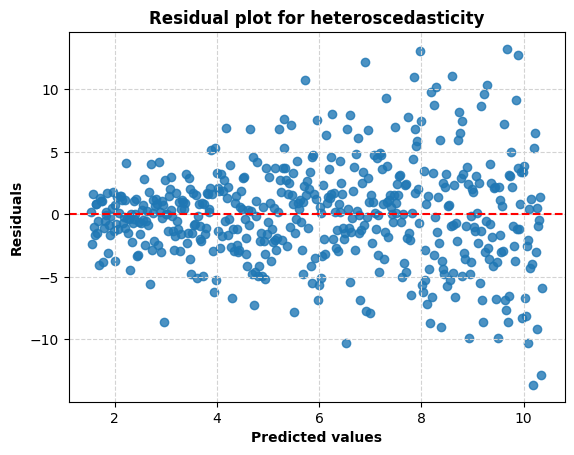

In [18]:
modelHe = sm.OLS(yhe, sm.add_constant(Xhe)).fit()
residuals = modelHe.resid
fig, ax = plt.subplots()
ax.scatter(modelHe.fittedvalues, residuals, alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', label='Horizontal Line')
ax.set_xlabel("Predicted values", fontweight='bold')
ax.set_ylabel("Residuals", fontweight='bold')
ax.set_title("Residual plot for heteroscedasticity", fontweight='bold')
ax.grid(color='lightgray', linestyle='--')
plt.show()

In [22]:
residuals = modelHe.resid
p_value = het_breuschpagan(residuals, sm.add_constant(Xhe))[1]
alpha = 0.05
print("Breusch-Pagan test p-value: ", p_value)
print("Any evidence of heteroscedasticity?: ", p_value < alpha)

Breusch-Pagan test p-value:  8.012874444614573e-15
Any evidence of heteroscedasticity?:  True


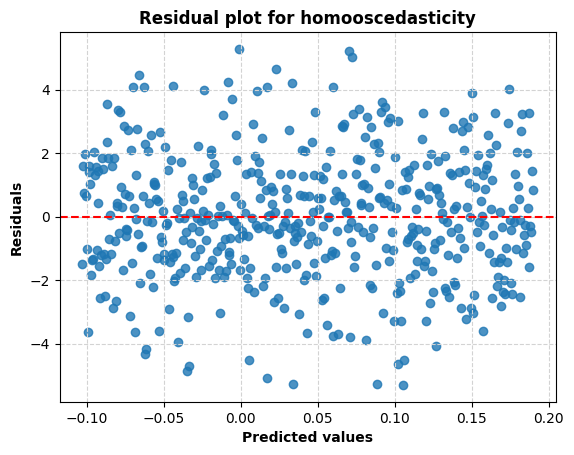

In [19]:
modelHo = sm.OLS(yho, sm.add_constant(Xho)).fit()
residuals = modelHo.resid
fig, ax = plt.subplots()
ax.scatter(modelHo.fittedvalues, residuals, alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', label='Horizontal Line')
ax.set_xlabel("Predicted values", fontweight='bold')
ax.set_ylabel("Residuals", fontweight='bold')
ax.set_title("Residual plot for homooscedasticity", fontweight='bold')
ax.grid(color='lightgray', linestyle='--')
plt.show()

In [21]:
residuals = modelHo.resid
p_value = het_breuschpagan(residuals, sm.add_constant(Xho))[1]
alpha = 0.05
print("Breusch-Pagan test p-value: ", p_value)
print("Any evidence of homoscedasticity?: ", p_value < alpha)

Breusch-Pagan test p-value:  0.9384102490680825
Any evidence of homoscedasticity?:  False


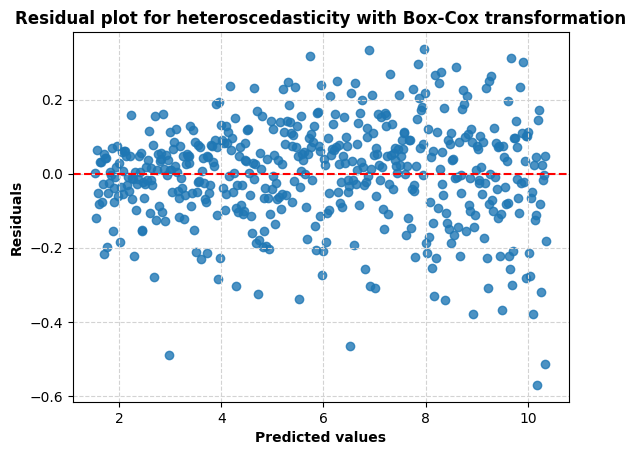

In [26]:
from scipy.stats import boxcox
yBC, fitted_lambda = boxcox(yhe + 15, lmbda=None)

'''
you can revert it with 

from scipy.special import inv_boxcox
original_y = inv_boxcox(yBC - 15, fitted_lambda)
'''

modelBC = sm.OLS(yBC, sm.add_constant(Xhe)).fit()
residuals = modelBC.resid
fig, ax = plt.subplots()
ax.scatter(modelHe.fittedvalues, residuals, alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', label='Horizontal Line')
ax.set_xlabel("Predicted values", fontweight='bold')
ax.set_ylabel("Residuals", fontweight='bold')
ax.set_title("Residual plot for heteroscedasticity with Box-Cox transformation", fontweight='bold')
ax.grid(color='lightgray', linestyle='--')
plt.show()

In [27]:
residuals = modelBC.resid
p_value = het_breuschpagan(residuals, sm.add_constant(Xhe))[1]
alpha = 0.05
print("Breusch-Pagan test p-value: ", p_value)
print("Any evidence of heteroscedasticity?: ", p_value < alpha)

Breusch-Pagan test p-value:  2.1072871716250098e-07
Any evidence of heteroscedasticity?:  True
